<a href="https://colab.research.google.com/github/chernandezrojas1991/exercises-u2-ml/blob/main/precios_de_casa_en_el_area_de_boston_en_1978.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

In [3]:
filename = "/content/drive/MyDrive/Coding Dojo/Machine Learning/Semana 2/Boston_Housing_from_Sklearn.csv"
df = pd.read_csv(filename)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


# 1) Realicen un mapa de calor de las correlaciones. Identifiquen cualquier característica que tenga un coeficiente de correlación de magnitud 0,5 (puede ser + o -) o mayor con el precio. Limitaremos nuestros análisis a estas tres características.

Crear matriz de correlación

In [4]:
corr_matrix = df.corr()

Generar mapa de calor

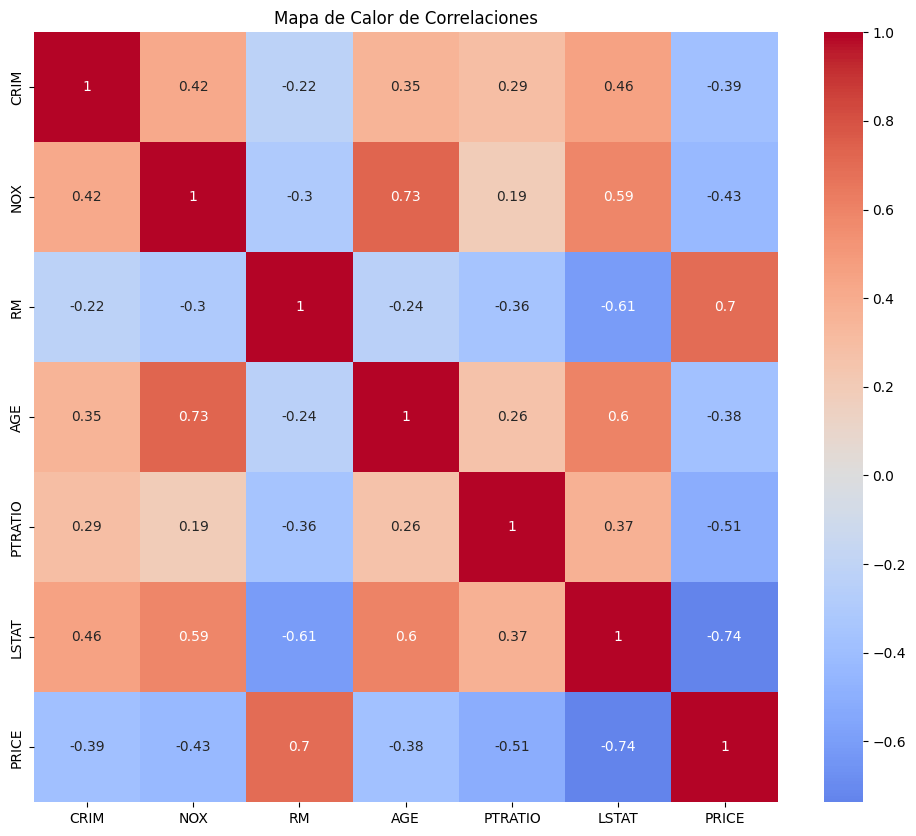

In [5]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

In [6]:
correlaciones_precio = corr_matrix['PRICE'].abs()
correlaciones_significativas = correlaciones_precio[correlaciones_precio >= 0.5]
print(correlaciones_significativas)

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
PRICE      1.000000
Name: PRICE, dtype: float64


De acuerdo al mapa de calor (gráfico) y al cálculo de correlaciones respecto al precio (PRICE) cuya magnitud sea 0.5 o mayor, se determina que aquellas correlaciones más fuertes son para:

*   RM: número promedio de habitaciones por vivienda
*   PTRATIO: proporción de alumnos por profesor por ciudad
*   LSTAT: porcentaje de menor nivel económico de la población

Para una mejor interpretación de los datos y correlaciones, se concluye que el *número promedio de habitaciones por vivienda* (**RM**) es determinante en el precio de la vivienda, vale decir, mientras más grande y con mayores distribuciones tenga la vivienda, mayor precio tendrá ésta. Para la *proporción de alumnos por profesor por ciudad* (**PTRATIO**) también tiene una correlación fuerte respecto al precio, ya que a mayor cantidad de estudiantes, esto puede significar que las casas construídas son más grandes, por lo tanto, más caras al estar cerca de establecimientos educacionales. Por último, el *porcentaje de menor nivel económico de la población* (**LSTAT**) está relacionado a un bajo precio de las viviendas.



# 2) Seleccionen las columnas para la matriz de características (X) y seleccionen el PRECIO para el vector objetivo (y).

In [7]:
X = df.drop(columns = 'PRICE')
y = df['PRICE']

# 3) Dividan los datos en grupos de entrenamiento y de prueba. ¡Usen el número 42 como semilla aleatoria random_state!

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# 4) Instancien el modelo y ajústenlo al conjunto de entrenamiento.

In [9]:
reg = LinearRegression()

In [10]:
reg.fit(X_train,y_train)

LinearRegression()

# 5) Evaluar el rendimiento de su modelo en el conjunto de entrenamiento y de prueba usando la puntuación R^2.  ¿Existe alguna diferencia entre el modelo de rendimiento en los datos de entrenamiento vs. los datos de prueba?

In [11]:
train_score = reg.score(X_train, y_train)
print(train_score)

0.6954015699310794


# Ejercicio de árbol de regresión (práctica)

1) Ejecutar un modelo de árbol de regresión con los parámetros predeterminados (profundidad ilimitada)

In [12]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [13]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [14]:
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [15]:
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.6193230918136841


La puntuación de R^2 es mucho más alta en el conjunto de entrenamiento que en el conjunto de test. Esto significa que el modelo sobreajustado.

Se procede a ajustar el modelo.

In [16]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

2) Determinar la profundidad del árbol por omisión.

In [17]:
dec_tree.get_depth()

20

La profundidad del árbol de regresión es de 20.

Opcional: Determinar cantidad de hojas

In [18]:
dec_tree.get_n_leaves()

360

3) Intentar diferentes valores para max_depth y determinar el valor óptimo basándose en el mejor (el más alto) valor R2. ¿Cuál es el max_depth óptimo según sus pruebas?

Prueba 1

In [19]:
dec_tree_2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
dec_tree_2.fit(X_train, y_train)
train_2_score = dec_tree_2.score(X_train, y_train)
test_2_score = dec_tree_2.score(X_test, y_test)
print(train_2_score)
print(test_2_score)

0.7089458256236383
0.6370379660938668


Prueba 2

In [20]:
dec_tree_3 = DecisionTreeRegressor(max_depth = 10, random_state = 42)
dec_tree_3.fit(X_train, y_train)
train_3_score = dec_tree_3.score(X_train, y_train)
test_3_score = dec_tree_3.score(X_test, y_test)
print(train_3_score)
print(test_3_score)

0.9867962386381032
0.8460104271509634


Prueba 3

In [22]:
dec_tree_4 = DecisionTreeRegressor(max_depth = 15, random_state = 42)
dec_tree_4.fit(X_train, y_train)
train_4_score = dec_tree_4.score(X_train, y_train)
test_4_score = dec_tree_4.score(X_test, y_test)
print(train_4_score)
print(test_4_score)

0.999476270721798
0.7338563810264247


Prueba 4

In [23]:
dec_tree_5 = DecisionTreeRegressor(max_depth = 20, random_state = 42)
dec_tree_5.fit(X_train, y_train)
train_5_score = dec_tree_5.score(X_train, y_train)
test_5_score = dec_tree_5.score(X_test, y_test)
print(train_5_score)
print(test_5_score)

1.0
0.6193230918136841


Visualización de R^2 vs max_depth

In [24]:
max_depth_range = list(range(2, 20))
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth,
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

Text(0.5, 1.0, 'R2 vs max_depth')

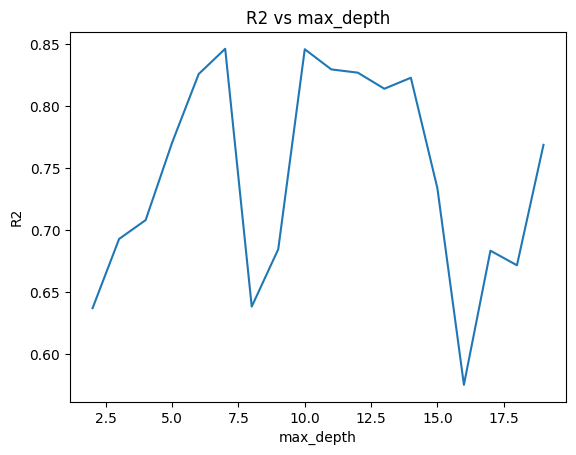

In [26]:
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');
plt.title('R2 vs max_depth')

Es claro ver en el gráfico que para alcanzar un valor máximo para R^2, max_depth debe ser igual a 7 o igual a 10.

4) ¿Cuál es el R2 del modelo final en el conjunto de entrenamiento y de prueba?

In [27]:
dec_tree_optimus = DecisionTreeRegressor(max_depth = 10, random_state = 42)
dec_tree_optimus.fit(X_train, y_train)
train_optimus_score = dec_tree_optimus.score(X_train, y_train)
test_optimus_score = dec_tree_optimus.score(X_test, y_test)
print(train_optimus_score)
print(test_optimus_score)

0.9867962386381032
0.8460104271509634


El valor para R^2 para el conjunto de entrenamiento es de 0.987 y para el conjunto de test es de 0.85.